In [10]:
import keras
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

import numpy as np
import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_dark'

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

from PIL import Image

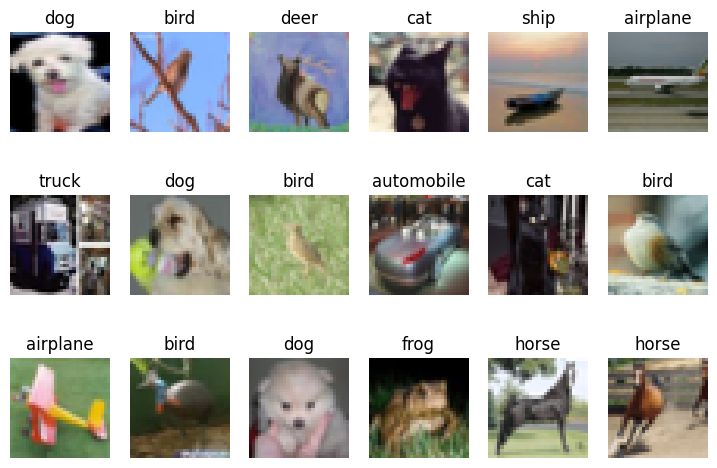

Single image size: 32 x 32
Number of channels: 3


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

cifar10_classes = {
    0: 'airplane', 
    1: 'automobile', 
    2: 'bird', 
    3: 'cat', 
    4: 'deer', 
    5: 'dog', 
    6: 'frog', 
    7: 'horse', 
    8: 'ship', 
    9: 'truck'
}

cols, rows = 6, 3
fig = plt.figure(figsize=(1.5 * cols, 2 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

w, h, c = X_train[0].shape
print(f"Single image size: {w} x {h}\nNumber of channels: {c}")

In [3]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [4]:
max_val = X_train.max()
X_train_norm = X_train / max_val
X_test_norm = X_test / max_val

In [19]:
model = Sequential([
    Input((w, h, c)),
    Conv2D(filters=16, kernel_size=3, padding='same'),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Conv2D(filters=256, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='elu'),
    Dropout(0.5),
    Dense(128, activation='elu'),
    Dropout(0.5),
    Dense(64, activation='elu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 706,058 (2.69 MB)

 Trainable params: 706,058 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
BATCH_SIZE = 256
EPOCHS = 27

with tf.device("/GPU:0"):
    history = model.fit(X_train_norm, y_train_cat, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test_norm, y_test_cat))

Epoch 1/27
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.2297 - loss: 2.0779 - val_accuracy: 0.4540 - val_loss: 1.4771
Epoch 2/27
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.4452 - loss: 1.5082 - val_accuracy: 0.6098 - val_loss: 1.0948
Epoch 3/27
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.5482 - loss: 1.2700 - val_accuracy: 0.6219 - val_loss: 1.0728
Epoch 4/27
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.5978 - loss: 1.1496 - val_accuracy: 0.6496 - val_loss: 0.9991
Epoch 5/27
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.6243 - loss: 1.0854 - val_accuracy: 0.6838 - val_loss: 0.8976
Epoch 6/27
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.6530 - loss: 1.0099 - val_accuracy: 0.7098 - val_loss: 0.8357
Epoch 7/27
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.6706 - loss: 0.9684 - val_accuracy: 0.7185 - val_loss: 0.8254
Epoch 8/27
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.6857 - loss: 0.9251 

In [21]:
loss_history = pd.DataFrame({
    'train': history.history['loss'],
    'test': history.history['val_loss']
})
px.line(loss_history, title='Loss')

In [22]:
accuracy_history = pd.DataFrame({
    'train': history.history['accuracy'],
    'test':  history.history['val_accuracy']
})
px.line(accuracy_history, title='Accuracy')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


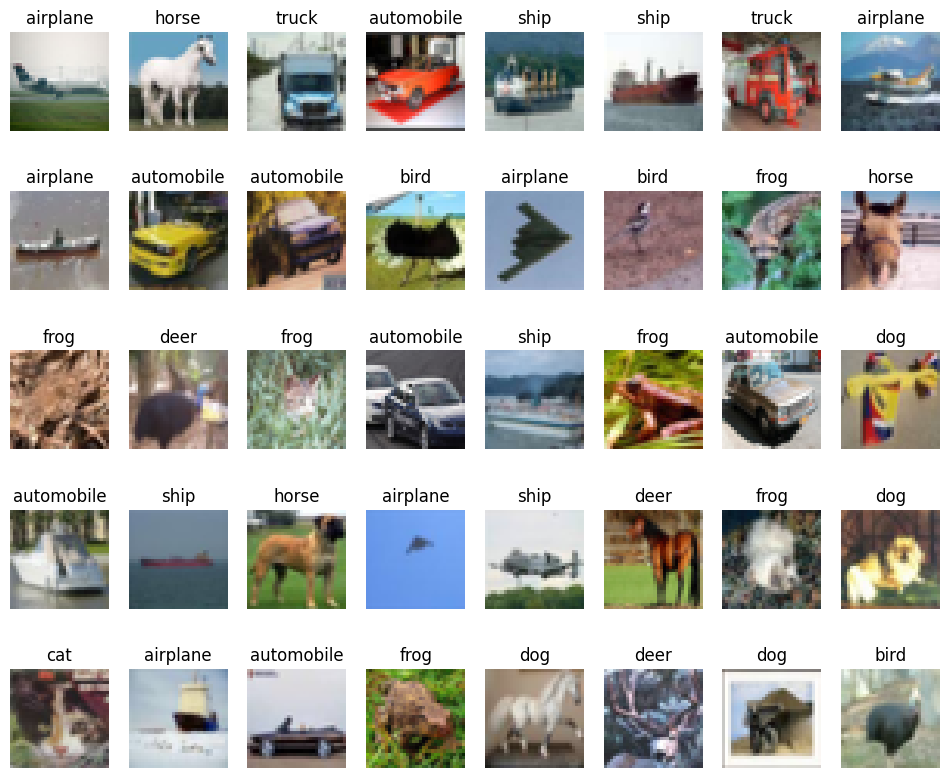

In [23]:
y_pred = np.argmax(model.predict(X_test_norm), axis=1)

cols, rows = 8, 5
fig = plt.figure(figsize=(1.5 * cols, 2 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_pred))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        ax.set_title(cifar10_classes[y_pred[random_index]])
plt.show()

In [24]:
print(classification_report(y_test, y_pred, target_names=cifar10_classes.values()))

              precision    recall  f1-score   support

    airplane       0.79      0.86      0.83      1000
  automobile       0.90      0.89      0.89      1000
        bird       0.76      0.67      0.71      1000
         cat       0.66      0.60      0.63      1000
        deer       0.75      0.83      0.78      1000
         dog       0.69      0.72      0.70      1000
        frog       0.81      0.89      0.85      1000
       horse       0.88      0.80      0.84      1000
        ship       0.90      0.86      0.88      1000
       truck       0.87      0.89      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

